In [1]:
import pandas as pd # data frame library
import seaborn as sns # data visialization library
import matplotlib.pyplot as plt
import numpy
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('uci breast cancer dataset.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df = df.drop(['id'], axis = 'columns')

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

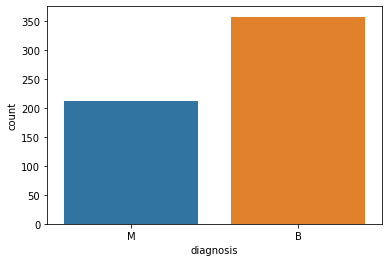

In [6]:
sns.countplot(x='diagnosis',data=df)

In [7]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [8]:
x = df.drop('diagnosis',axis=1)

In [9]:
y = df[['diagnosis']]

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=.75, random_state=42)

# Apply Decision Tree Classifier

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dt = DecisionTreeClassifier()

In [14]:
dt.fit(xtrain,ytrain) #train the model with 70% of data from dataset

DecisionTreeClassifier()

In [15]:
pred = dt.predict(xtest) # pred is corrsponding to ytest

In [16]:
ytest

,diagnosis
204,B
70,M
131,M
431,B
540,B
...,...
89,B
199,M
411,B
18,M


In [17]:
pred # Predicted value of Y

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B'],
      dtype=object)

In [18]:
dt.score(xtest,ytest)

0.9440559440559441

# Evaluate the ML model

In [19]:
from sklearn.metrics import classification_report , accuracy_score, confusion_matrix, plot_roc_curve

In [20]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           B       0.97      0.94      0.95        89
           M       0.91      0.94      0.93        54

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



In [21]:
test_confusion_matrix = confusion_matrix(ytest,pred)

<AxesSubplot:>

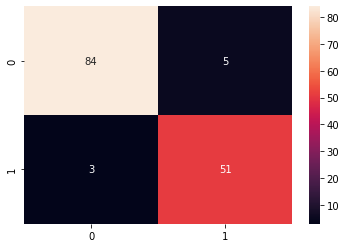

In [22]:
sns.heatmap(test_confusion_matrix, annot=True)

In [23]:
tp, fp, fn, tn = confusion_matrix(ytest,pred).reshape(-1)

In [24]:
dt.score(xtest,ytest)

0.9440559440559441

# Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
clf = RandomForestClassifier() # default parameters, 100 Tree = n_estimators=100

In [28]:
clf.fit(xtrain, ytrain)

RandomForestClassifier()

In [29]:
clf.score(xtest, ytest)

0.972027972027972

# Some dataset for practice

In [32]:
#https://scikit-learn.org/stable/datasets/toy_dataset.html
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
#https://scikit-learn.org/stable/datasets/real_world.html

# Hyper Parameter Tuning

In [31]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#https://scikit-learn.org/0.16/modules/generated/sklearn.grid_search.RandomizedSearchCV.html

# Grid Search CV

In [33]:
import numpy as np
trees = np.random.randint(15,150,30)

In [44]:
trees

array([131, 138, 129,  26,  20, 132, 138, 149,  48,  88,  60,  80,  79,
        37,  71,  44,  70,  78, 147,  68,  19,  55, 120, 111,  48,  77,
       124,  79,  89, 137])

In [73]:
param_grid={
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [74]:
from sklearn.model_selection import GridSearchCV

In [76]:
clf_grid=GridSearchCV(estimator=clf,param_grid=param_grid,cv=3)

In [77]:
clf_grid.fit(xtrain,ytrain)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [79]:
clf_grid.cv_results_

{'mean_fit_time': array([0.25034229, 0.49609518, 0.19786477, 0.49466928, 0.19265477,
        0.47925266, 0.20409584, 0.49989724, 0.19787391, 0.49466817,
        0.19408107, 0.47770961, 0.203077  , 0.49987737, 0.20308534,
        0.49987316, 0.19265381, 0.4842627 , 0.20305713, 0.53512049,
        0.23450955, 0.55459181, 0.19805463, 0.82271616, 0.20887939,
        0.54534427, 0.22030505, 0.52200715, 0.19885349, 0.50347209,
        0.21627744, 0.55904746, 0.2197473 , 0.54558595, 0.21343327,
        0.54435651, 0.232277  , 0.56437818, 0.21776326, 0.5504624 ,
        0.21447905, 0.51437775, 0.23705737, 0.59963568, 0.26137519,
        0.57040421, 0.21404727, 0.5248402 , 0.22287138, 0.54154476,
        0.21871026, 0.54153935, 0.20829169, 0.5618995 , 0.22165163,
        0.55045255, 0.22006655, 0.54968127, 0.20966911, 0.52921383]),
 'std_fit_time': array([6.80484439e-02, 1.67287590e-02, 7.35581039e-03, 7.35958101e-03,
        7.36800499e-03, 1.49878702e-02, 1.42746746e-03, 1.36378762e-05,
     

In [81]:
tuning_result=pd.DataFrame(clf_grid.cv_results_)

In [82]:
tuning_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.250342,0.068048,0.020831,0.007362,gini,4,auto,200,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.936620,0.957746,0.957746,0.950704,0.009959,28
1,0.496095,0.016729,0.036453,0.007355,gini,4,auto,500,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.929577,0.957746,0.950704,0.946009,0.011970,53
2,0.197865,0.007356,0.010411,0.007362,gini,4,sqrt,200,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.936620,0.957746,0.943662,0.946009,0.008783,53
3,0.494669,0.007360,0.031241,0.000020,gini,4,sqrt,500,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.936620,0.950704,0.943662,0.943662,0.005750,58
4,0.192655,0.007368,0.015630,0.000014,gini,4,log2,200,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.936620,0.964789,0.943662,0.948357,0.011970,42
5,0.479253,0.014988,0.038658,0.006389,gini,4,log2,500,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.936620,0.957746,0.957746,0.950704,0.009959,28
6,0.204096,0.001427,0.015608,0.000012,gini,5,auto,200,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.929577,0.957746,0.950704,0.946009,0.011970,53
7,0.499897,0.000014,0.031235,0.000006,gini,5,auto,500,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.936620,0.964789,0.950704,0.950704,0.011500,28
8,0.197874,0.007367,0.015618,0.000018,gini,5,sqrt,200,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.929577,0.957746,0.957746,0.948357,0.013279,44
9,0.494668,0.007359,0.041663,0.007354,gini,5,sqrt,500,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.929577,0.957746,0.950704,0.946009,0.011970,53


In [85]:
tuning_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mean_fit_time       60 non-null     float64
 1   std_fit_time        60 non-null     float64
 2   mean_score_time     60 non-null     float64
 3   std_score_time      60 non-null     float64
 4   param_criterion     60 non-null     object 
 5   param_max_depth     60 non-null     object 
 6   param_max_features  60 non-null     object 
 7   param_n_estimators  60 non-null     object 
 8   params              60 non-null     object 
 9   split0_test_score   60 non-null     float64
 10  split1_test_score   60 non-null     float64
 11  split2_test_score   60 non-null     float64
 12  mean_test_score     60 non-null     float64
 13  std_test_score      60 non-null     float64
 14  rank_test_score     60 non-null     int32  
dtypes: float64(9), int32(1), object(5)
memory usage: 6.9+ KB


In [86]:
clf_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'log2',
 'n_estimators': 200}

In [87]:
clf_grid.best_score_

0.960093896713615

In [88]:
clf2=clf_grid.best_estimator_

In [89]:
clf2

RandomForestClassifier(criterion='entropy', max_depth=7, max_features='log2',
                       n_estimators=200)

In [90]:
clf2.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features='log2',
                       n_estimators=200)

In [92]:
clf2.score(xtest,ytest)

0.972027972027972

# Randomized Search CV

In [100]:
param_grid2={
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [101]:
from sklearn.model_selection import RandomizedSearchCV

In [102]:
clf_ran=RandomizedSearchCV(clf,param_grid2,cv=3)

In [103]:
clf_ran.fit(xtrain,ytrain)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 5, 6, 7, 8],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [200, 500]})

In [108]:
Random_Tuning_Result=pd.DataFrame(clf_ran.cv_results_)

In [109]:
Random_Tuning_Result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.560225,0.014313,0.033750,0.009867,500,sqrt,5,entropy,"{'n_estimators': 500, 'max_features': 'sqrt', ...",0.950704,0.957746,0.957746,0.955399,0.003320,2
1,0.220463,0.002497,0.015623,0.000001,200,auto,8,entropy,"{'n_estimators': 200, 'max_features': 'auto', ...",0.950704,0.957746,0.950704,0.953052,0.003320,6
2,0.524802,0.008342,0.036457,0.007359,500,log2,8,entropy,"{'n_estimators': 500, 'max_features': 'log2', ...",0.950704,0.964789,0.950704,0.955399,0.006640,2
3,0.204283,0.001190,0.015737,0.000170,200,sqrt,5,gini,"{'n_estimators': 200, 'max_features': 'sqrt', ...",0.943662,0.957746,0.943662,0.948357,0.006640,8
4,0.200259,0.008758,0.015622,0.000018,200,auto,5,gini,"{'n_estimators': 200, 'max_features': 'auto', ...",0.943662,0.957746,0.957746,0.953052,0.006640,6
5,0.213730,0.007026,0.015637,0.000011,200,auto,4,entropy,"{'n_estimators': 200, 'max_features': 'auto', ...",0.936620,0.964789,0.964789,0.955399,0.013279,1
6,0.514561,0.013830,0.036450,0.007364,500,auto,7,gini,"{'n_estimators': 500, 'max_features': 'auto', ...",0.943662,0.964789,0.957746,0.955399,0.008783,2
7,0.500784,0.008605,0.036465,0.007368,500,sqrt,4,gini,"{'n_estimators': 500, 'max_features': 'sqrt', ...",0.936620,0.950704,0.943662,0.943662,0.005750,10
8,0.222765,0.005686,0.015720,0.000153,200,sqrt,4,entropy,"{'n_estimators': 200, 'max_features': 'sqrt', ...",0.943662,0.957746,0.936620,0.946009,0.008783,9
9,0.217474,0.003587,0.015642,0.000002,200,sqrt,8,entropy,"{'n_estimators': 200, 'max_features': 'sqrt', ...",0.950704,0.964789,0.943662,0.953052,0.008783,5


In [110]:
clf_ran.best_params_

{'n_estimators': 200,
 'max_features': 'auto',
 'max_depth': 4,
 'criterion': 'entropy'}

In [111]:
clf_ran.score(xtest,ytest)

0.972027972027972

In [113]:
clf3=clf_ran.best_estimator_

In [114]:
clf3.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=200)

In [115]:
clf3.score(xtest,ytest)

0.972027972027972